In [5]:
from scipy.io import loadmat
import numpy as np
from pathlib import Path

dataset_path = Path('data') / 'data.mat'
if not dataset_path.exists():
    alt = Path.cwd().parent / 'data' / 'data.mat'
    if alt.exists():
        dataset_path = alt
    else:
        raise FileNotFoundError(f"data.mat not found under {Path.cwd()} or its parent")

mat_data = loadmat(dataset_path)
print(mat_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'hB', 'souradniceGNSS', 'souradniceX', 'souradniceY', 'souradniceZ'])


Vykresluji povrch terénu (může to chvíli trvat)...
...povrch vykreslen.


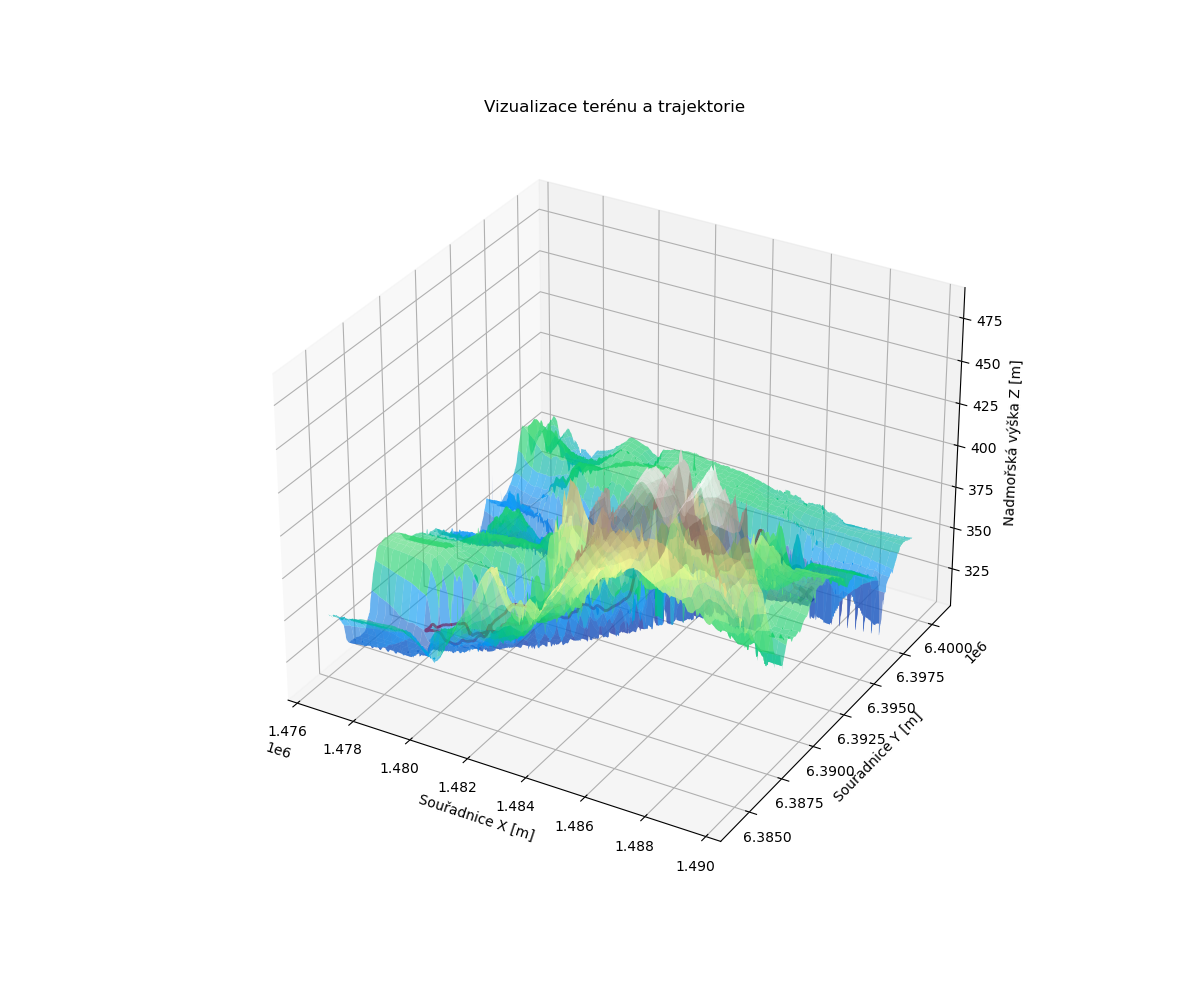

In [ ]:
import matplotlib.pyplot as plt

%matplotlib widget

try:

    souradniceX_mapa = mat_data['souradniceX']
    souradniceY_mapa = mat_data['souradniceY']
    souradniceZ_mapa = mat_data['souradniceZ']
    
    souradniceGNSS = mat_data['souradniceGNSS'] 

except KeyError as e:
    print(f"Chyba: Proměnná {e} nebyla nalezena v .mat souboru.")
    exit()


x_trajektorie = souradniceGNSS[0, :]
y_trajektorie = souradniceGNSS[1, :]
z_trajektorie = souradniceGNSS[2, :]


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')


print("Vykresluji povrch terénu (může to chvíli trvat)...")
ax.plot_surface(souradniceX_mapa, souradniceY_mapa, souradniceZ_mapa, 
                  rstride=50, cstride=50, 
                  cmap='terrain',      
                  alpha=0.6,          
                  label='Terén')
print("...povrch vykreslen.")


ax.plot(x_trajektorie, y_trajektorie, z_trajektorie, 
        'r-',             
        linewidth=2, 
        label='Trajektorie GNSS')


ax.plot([x_trajektorie[0]], [y_trajektorie[0]], [z_trajektorie[0]], 
        'go',             
        markersize=8, 
        label='Start')

ax.plot([x_trajektorie[-1]], [y_trajektorie[-1]], [z_trajektorie[-1]], 
        'kx',            
        markersize=10, 
        markeredgewidth=3,
        label='Cíl')



ax.set_xlabel('Souřadnice X [m]')
ax.set_ylabel('Souřadnice Y [m]')
ax.set_zlabel('Nadmořská výška Z [m]')
ax.set_title('Vizualizace terénu a trajektorie')
ax.grid(True)

plt.show()